In [1]:
import pandas as pd
df = pd.read_csv('/content/Dataset .csv')

df.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [2]:
df = df.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality','Locality Verbose', 'Rating color', 'Rating text'], axis=1)
df.columns.tolist() # these are the unwanted values


['Country Code',
 'City',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Votes']

In [3]:
df.isnull().sum() # to check any missing values

,0
Country Code,0
City,0
Longitude,0
Latitude,0
Cuisines,9
Average Cost for two,0
Currency,0
Has Table booking,0
Has Online delivery,0
Is delivering now,0


In [4]:
cc = df['Cuisines'].mode()[0]

print(cc)

North Indian


In [5]:
df['Cuisines'] = df['Cuisines'].fillna(cc) # filling the missing values

df = df.dropna()
df.isnull().sum()

,0
Country Code,0
City,0
Longitude,0
Latitude,0
Cuisines,0
Average Cost for two,0
Currency,0
Has Table booking,0
Has Online delivery,0
Is delivering now,0


In [6]:
from sklearn.preprocessing import LabelEncoder
columns = ['Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu','City']

for column in columns:
  if df[column].dtype == 'object':
    df[column] = LabelEncoder().fit_transform(df[column])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']


X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)


model1 = LinearRegression()
model1.fit(X_train1, y_train1)

model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train2, y_train2)


RandomForestRegressor(random_state=42)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

pred1 = model1.predict(X_test1)
mse1 = mean_squared_error(y_test1, pred1)
r1 = r2_score(y_test1, pred1)

pred2 = model2.predict(X_test2)
mse2 = mean_squared_error(y_test2, pred2)
r2= r2_score(y_test2, pred2)

print("linear regression")
print("mean square error:", mse1)
print("R square:", r1)

print("random forest")
print("mean square error:", mse2)
print("R square:", r2)

# calculating the regression and random forest values

linear regression
mean square error: 1.5860893603897637
R square: 0.30315755214599704
random forest
mean square error: 0.08771979801151228
R square: 0.9614606337460206


                 Feature  Importance
12                 Votes    0.947474
2              Longitude    0.015274
3               Latitude    0.011833
4               Cuisines    0.010406
5   Average Cost for two    0.006691
0           Country Code    0.003236
1                   City    0.001781
8    Has Online delivery    0.001131
11           Price range    0.000944
6               Currency    0.000654
7      Has Table booking    0.000461
9      Is delivering now    0.000116
10  Switch to order menu    0.000000


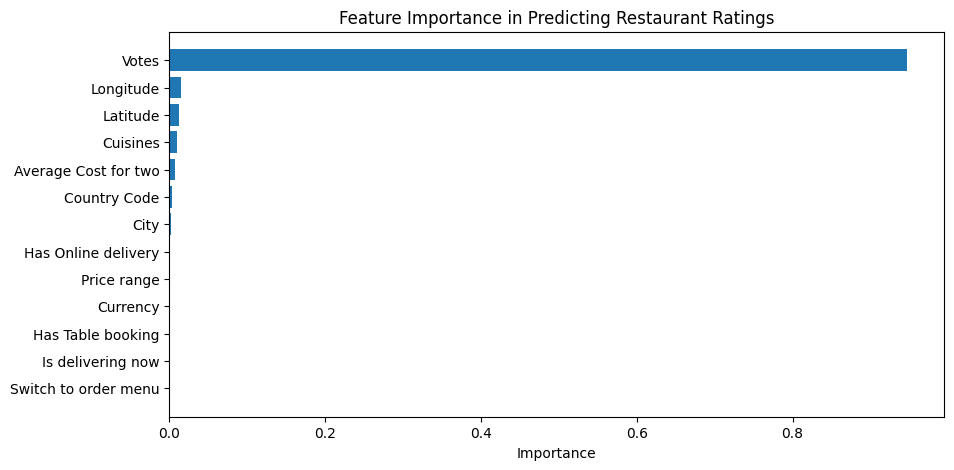

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

features = X.columns
importances = model2.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


print(importance_df)

plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance in Predicting Restaurant Ratings")
plt.xlabel("Importance")
plt.show()
# votes has the most  importance in predicting the restaurant ratings